In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('C:/Users/Keziah/Downloads/top50.csv', encoding="ISO-8859-1")
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
1,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
2,11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
3,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
4,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92


In [7]:
#Track.Name - Name of the Track

#Artist.Name - Name of the Artist

#Genre - the genre of the track

#Beats.Per.Minute - The tempo of the song.

#Energy - The energy of a song - the higher the value, the more energtic. song

#Danceability - The higher the value, the easier it is to dance to this song.

#Loudness..dB.. - The higher the value, the louder the song.

#Liveness - The higher the value, the more likely the song is a live recording.

#Valence. - The higher the value, the more positive mood for the song.

#Length. - The duration of the song.

#Acousticness.. - The higher the value the more acoustic the song is.

#Speechiness. - The higher the value the more spoken words the song contains.

#Popularity - The higher the value the more popular the song is.

In [8]:
df.shape

(50, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [10]:
df.describe()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [11]:
df.rename(columns={'Track.Name':'track_name','Artist.Name':'artist_name','Beats.Per.Minute':'beats_per_minute','Loudness..dB..':'Loudness(dB)','Valence.':'Valence','Length.':'Length', 'Acousticness..':'Acousticness','Speechiness.':'Speechiness'},inplace=True)
df.head()

,Unnamed: 0,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
1,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
2,11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
3,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
4,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92


In [12]:
df.drop(["Unnamed: 0"], inplace = True, axis = 1)
df['track_name'][32] = '11 PM'

In [13]:
df.isnull().sum()

track_name          0
artist_name         0
Genre               0
beats_per_minute    0
Energy              0
Danceability        0
Loudness(dB)        0
Liveness            0
Valence             0
Length              0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64

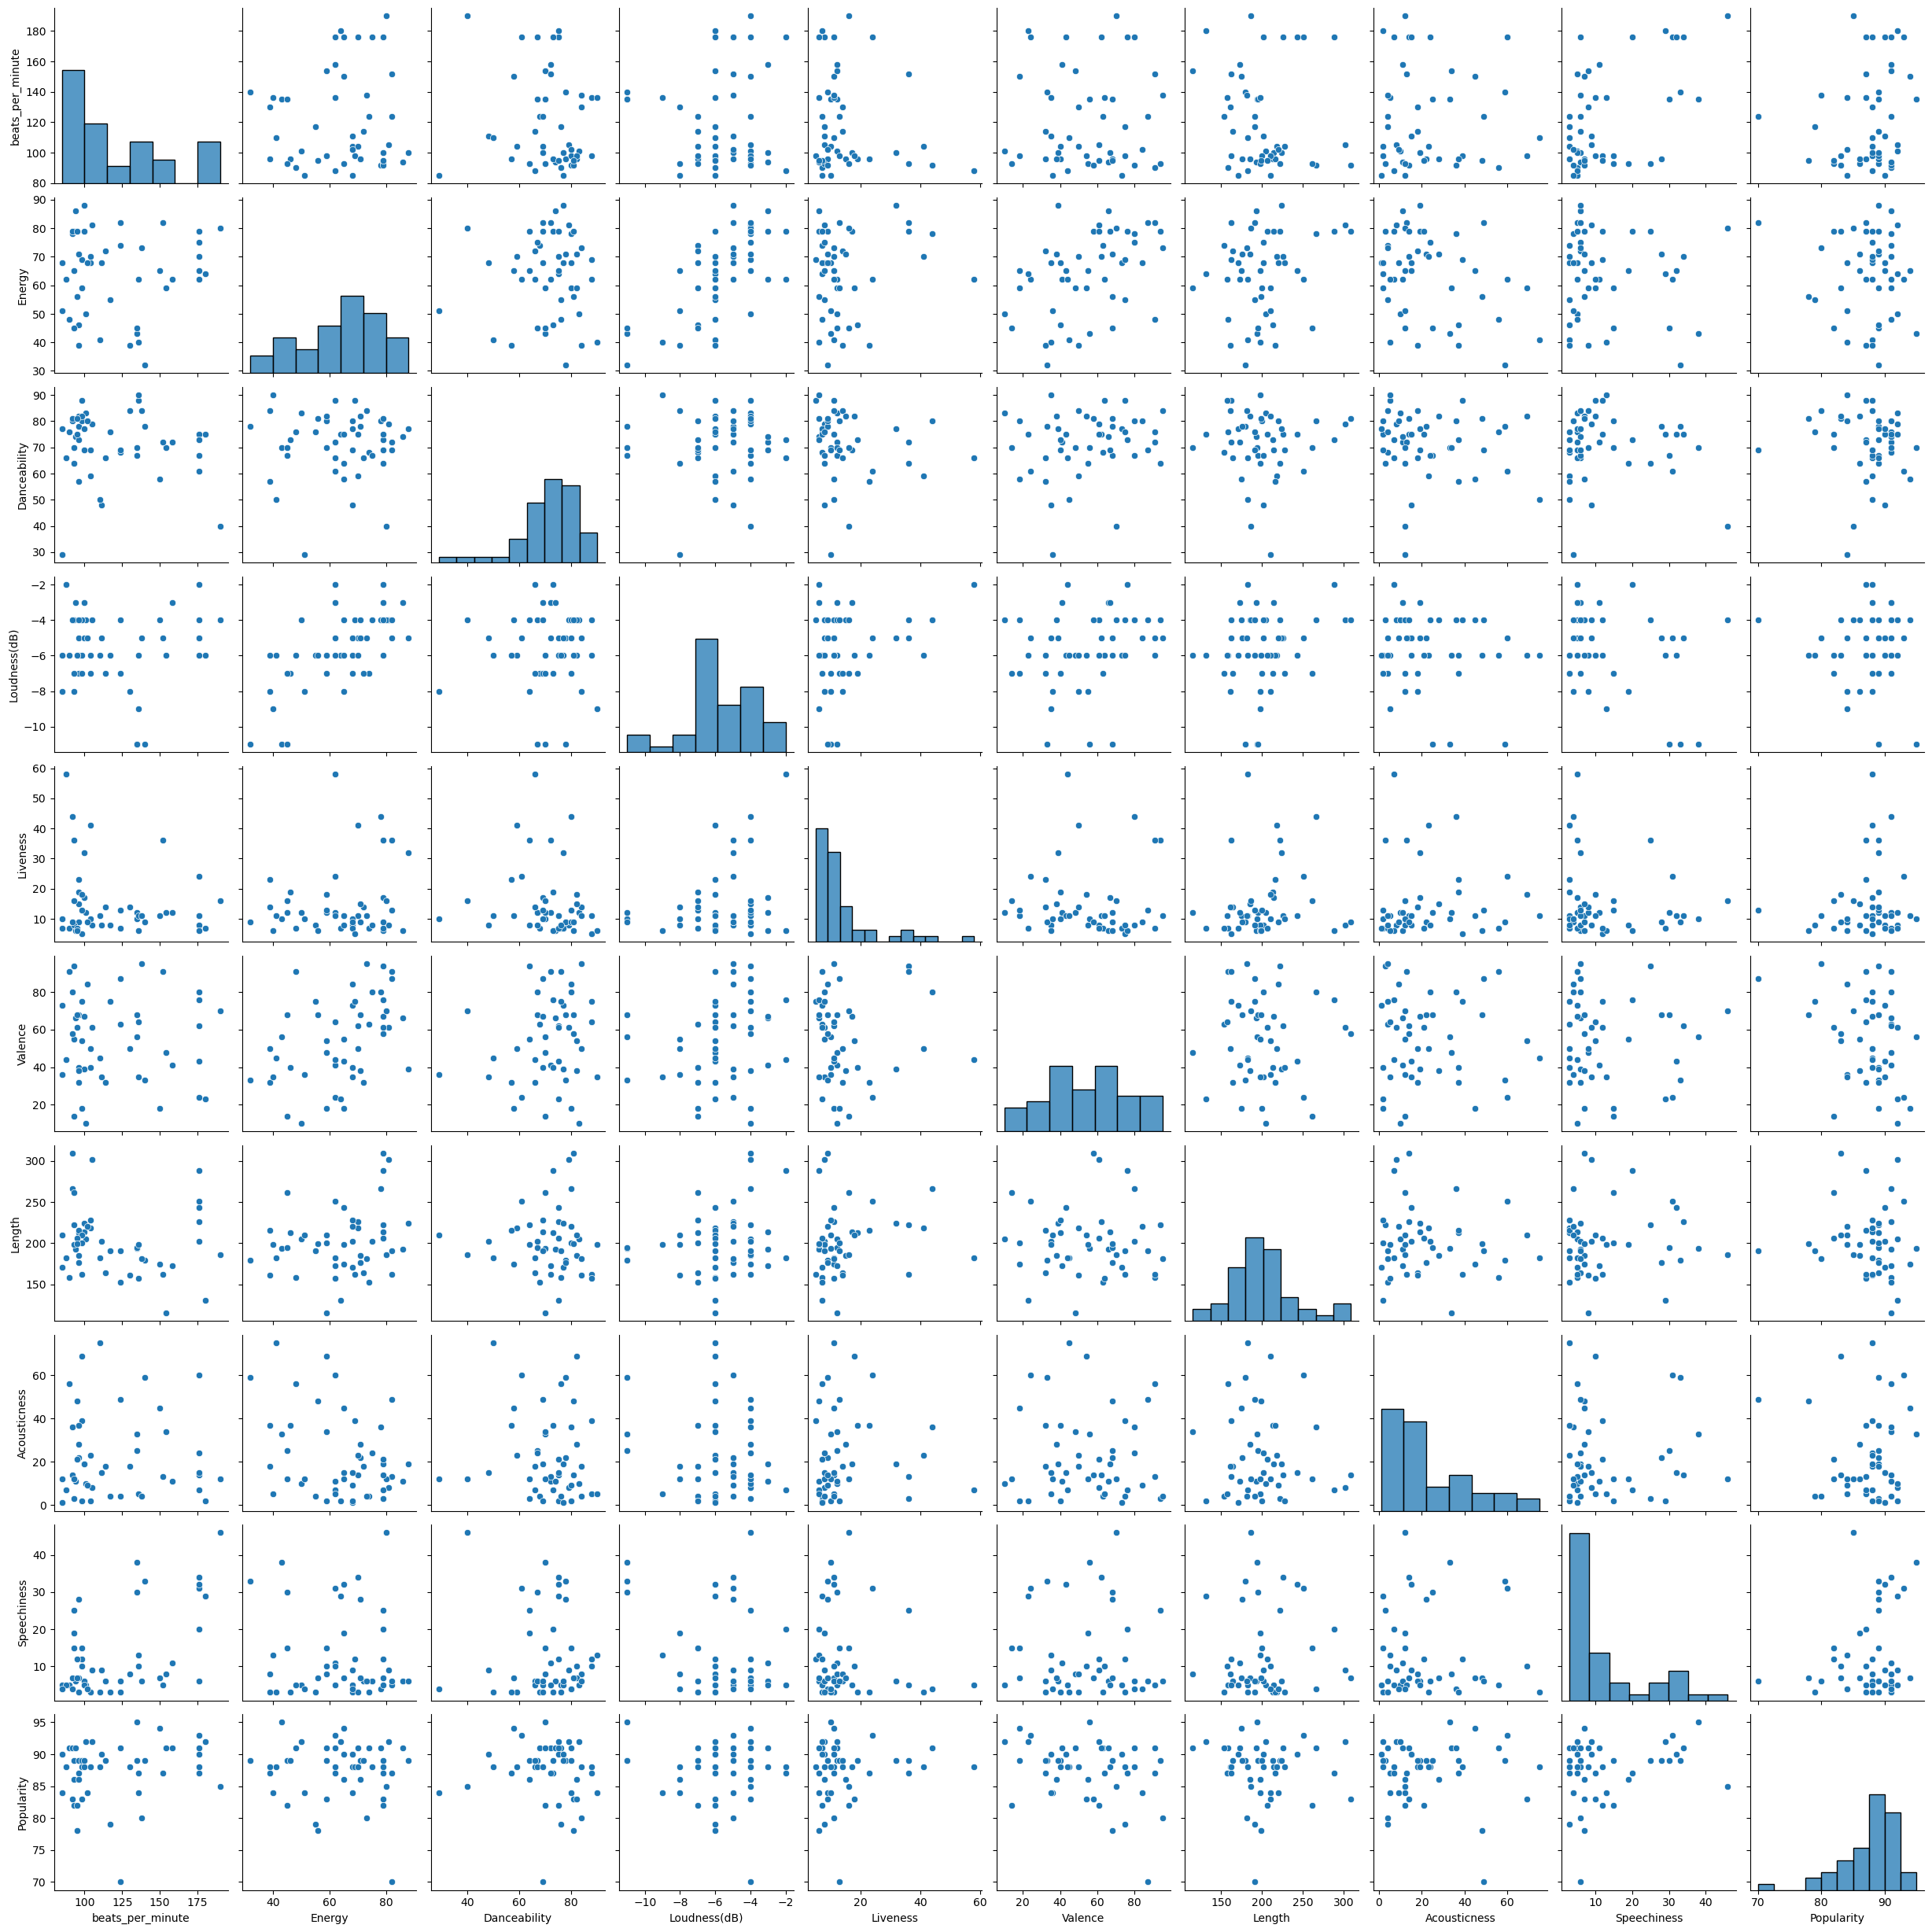

In [14]:
sns.pairplot(df)

In [15]:
# Spearman’s r is less sensitive to outliers
df.corr(method='spearman')

,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
beats_per_minute,1.000000,0.012491,-0.092086,0.013771,-0.032899,-0.048304,-0.198159,-0.010390,0.391641,0.217002
Energy,0.012491,1.000000,-0.048890,0.635464,0.013355,0.466911,0.188935,-0.211494,-0.034860,-0.044186
Danceability,-0.092086,-0.048890,1.000000,0.009268,-0.261500,0.154821,-0.078659,-0.127963,0.103832,-0.140960
Loudness(dB),0.013771,0.635464,0.009268,1.000000,0.113606,0.317048,0.164729,-0.040145,-0.063160,0.072366
Liveness,-0.032899,0.013355,-0.261500,0.113606,1.000000,-0.186640,0.201778,0.203657,-0.136935,0.012037
Valence,-0.048304,0.466911,0.154821,0.317048,-0.186640,1.000000,-0.081093,-0.053447,-0.094742,-0.264501
Length,-0.198159,0.188935,-0.078659,0.164729,0.201778,-0.081093,1.000000,-0.004734,0.020217,-0.121973
Acousticness,-0.010390,-0.211494,-0.127963,-0.040145,0.203657,-0.053447,-0.004734,1.000000,0.016973,0.035626
Speechiness,0.391641,-0.034860,0.103832,-0.063160,-0.136935,-0.094742,0.020217,0.016973,1.000000,0.165431
Popularity,0.217002,-0.044186,-0.140960,0.072366,0.012037,-0.264501,-0.121973,0.035626,0.165431,1.000000


<AxesSubplot:>

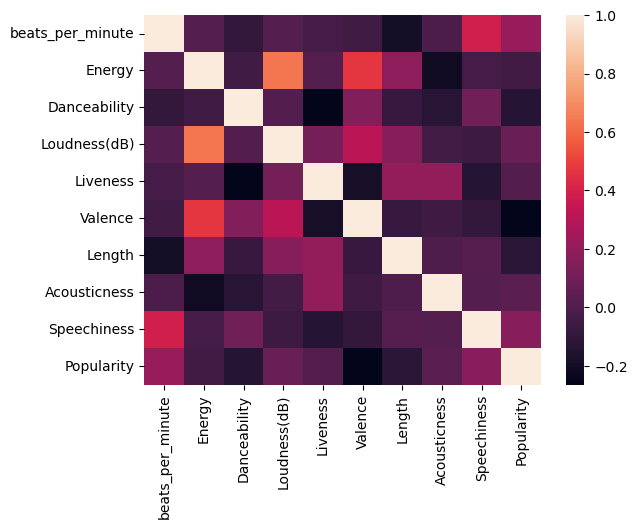

In [16]:
sns.heatmap(df.corr(method='spearman'))

In [17]:
popular_genre=df.groupby('Genre').size().unique
print(popular_genre)

<bound method Series.unique of Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
dtype: int64>


In [18]:
popular_artist=df.groupby('artist_name').size().unique
print(popular_artist)

<bound method Series.unique of artist_name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSALÍA             1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
dtype: int64>


<AxesSubplot:xlabel='Popularity', ylabel='Density'>

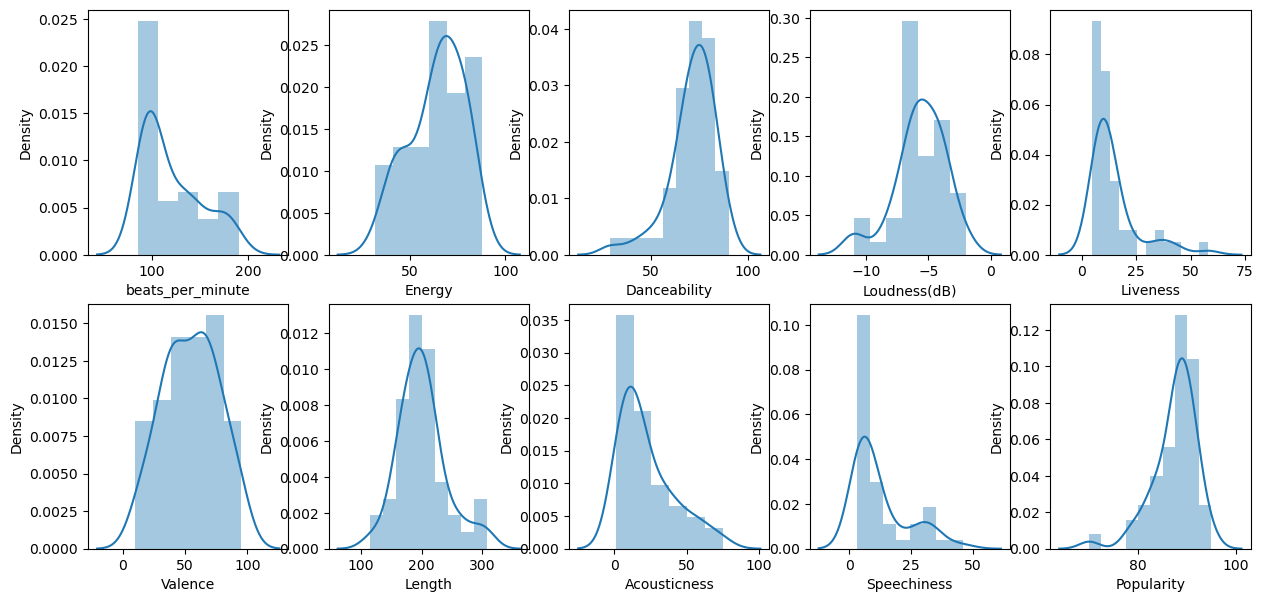

In [19]:
# A Distplot or distribution plot, depicts the variation in the data distribution. 
# Seaborn Distplot represents the overall distribution of continuous data variables.

plt.figure(figsize=(15,7))
plt.subplot(2,5,1)
sns.distplot(df['beats_per_minute'])

plt.subplot(2,5,2)
sns.distplot(df['Energy'])

plt.subplot(2,5,3)
sns.distplot(df['Danceability'])

plt.subplot(2,5,4)
sns.distplot(df['Loudness(dB)'])

plt.subplot(2,5,5)
sns.distplot(df['Liveness'])

plt.subplot(2,5,6)
sns.distplot(df['Valence'])

plt.subplot(2,5,7)
sns.distplot(df['Length'])

plt.subplot(2,5,8)
sns.distplot(df['Acousticness'])

plt.subplot(2,5,9)
sns.distplot(df['Speechiness'])

plt.subplot(2,5,10)
sns.distplot(df['Popularity'])


In [20]:
df.skew()

beats_per_minute    0.854504
Energy             -0.453199
Danceability       -1.379891
Loudness(dB)       -0.831915
Liveness            2.203937
Valence            -0.046490
Length              0.748554
Acousticness        1.135290
Speechiness         1.377581
Popularity         -1.503434
dtype: float64

## Outlier Detection using Z-score method & Treatment using Capping

beats_per_minute   
Energy             
Danceability       
Loudness(dB)             
Valence            
Length              
Acousticness        
Speechiness         

In [21]:
# the boundary values are:
print('Highest value of beats_per_minute', round(df['beats_per_minute'].mean()+3*df['beats_per_minute'].std(),3))
print('Lowest value of beats_per_minute', round(df['beats_per_minute'].mean()-3*df['beats_per_minute'].std(),3))

Highest value of beats_per_minute 212.755
Lowest value of beats_per_minute 27.365


In [22]:
df[(df['beats_per_minute']>212.755) | (df['beats_per_minute']<27.365)]

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity


In [23]:
# the boundary values are:
print('Highest value of Energy', round(df['Energy'].mean()+3*df['Energy'].std(),3))
print('Lowest value of Energy', round(df['Energy'].mean()-3*df['Energy'].std(),3))

Highest value of Energy 106.756
Lowest value of Energy 21.364


In [24]:
df[(df['Energy']>106.756) | (df['Energy']<21.364)]

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity


In [25]:
# the boundary values are:
print('Highest value of Danceability', round(df['Danceability'].mean()+3*df['Danceability'].std(),3))
print('Lowest value of Danceability', round(df['Danceability'].mean()-3*df['Danceability'].std(),3))

Highest value of Danceability 107.17
Lowest value of Danceability 35.59


In [26]:
df[(df['Danceability']>107.17) | (df['Danceability']<35.59)]

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
40,Takeaway,The Chainsmokers,edm,85,51,29,-8,10,36,210,12,4,84


In [27]:
df['Danceability'] = np.where(df['Danceability']>107.17, 107.17 , df['Danceability']) 
df['Danceability'] = np.where(df['Danceability']<35.59 , 35.59 , df['Danceability'])

In [28]:
df['Danceability'].min()

35.59

In [29]:
df['Danceability'].max()

90.0

In [30]:
# the boundary values are:
print('Highest value of Loudness(dB)', round(df['Loudness(dB)'].mean()+3*df['Loudness(dB)'].std(),3))
print('Lowest value of Loudness(dB)', round(df['Loudness(dB)'].mean()-3*df['Loudness(dB)'].std(),3))

Highest value of Loudness(dB) 0.509
Lowest value of Loudness(dB) -11.829


In [31]:
df[(df['Loudness(dB)']>0.509) | (df['Loudness(dB)']<-11.829)]

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity


In [32]:
# the boundary values are:
print('Highest value of Valence', round(df['Valence'].mean()+3*df['Valence'].std(),3))
print('Lowest value of Valence', round(df['Valence'].mean()-3*df['Valence'].std(),3))

Highest value of Valence 121.608
Lowest value of Valence -12.408


In [33]:
df[(df['Valence']>121.608) | (df['Valence']<-12.408)]

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity


In [34]:
# the boundary values are:
print('Highest value of Length', round(df['Length'].mean()+3*df['Length'].std(),3))
print('Lowest value of Length', round(df['Length'].mean()-3*df['Length'].std(),3))

Highest value of Length 318.392
Lowest value of Length 83.528


In [35]:
df[(df['Length']>318.392) | (df['Length']<83.528)]

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity


In [36]:
# the boundary values are:
print('Highest value of Acousticness', round(df['Acousticness'].mean()+3*df['Acousticness'].std(),3))
print('Lowest value of Acousticness', round(df['Acousticness'].mean()-3*df['Acousticness'].std(),3))

Highest value of Acousticness 79.147
Lowest value of Acousticness -34.827


In [37]:
df[(df['Acousticness']>79.147) | (df['Acousticness']<-34.827)]

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity


In [38]:
# the boundary values are:
print('Highest value of Speechiness', round(df['Speechiness'].mean()+3*df['Speechiness'].std(),3))
print('Lowest value of Speechiness', round(df['Speechiness'].mean()-3*df['Speechiness'].std(),3))

Highest value of Speechiness 45.965
Lowest value of Speechiness -21.005


In [39]:
df[(df['Speechiness']>45.965) | (df['Speechiness']<-21.005)]

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
38,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40.0,-4,16,70,186,12,46,85


In [40]:
df['Speechiness'] = np.where(df['Speechiness']>45.965, 45.965 , df['Speechiness']) 
df['Speechiness'] = np.where(df['Speechiness']<-21.005 , -21.005 , df['Speechiness'])

In [41]:
df['Speechiness'].min()

3.0

In [42]:
df['Speechiness'].max()

45.965

## Outlier Detection using IQR method and Treatment using Capping

Liveness  
Popularity 

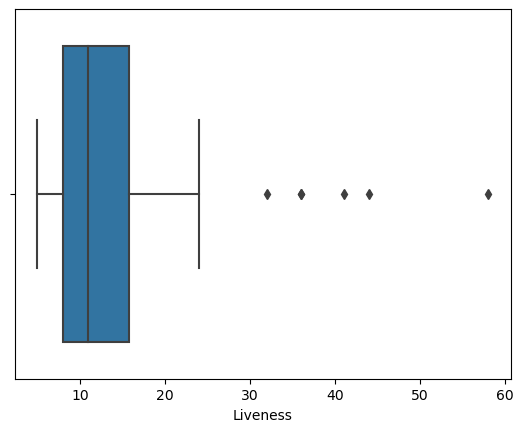

In [43]:
sns.boxplot(df['Liveness'])
plt.show()

In [44]:
#Finding the IQR

Q1 = df['Liveness'].quantile(0.25)
Q3 = df['Liveness'].quantile(0.75)

IQR = Q3-Q1

upper_limit = Q3+1.5*IQR
lower_limit = Q1-1.5*IQR

print('lower limit: ', lower_limit)
print('upper limit: ', upper_limit)
print('IQR:' , IQR)

lower limit:  -3.625
upper limit:  27.375
IQR: 7.75


In [45]:
df[(df['Liveness']>upper_limit) | (df['Liveness']<lower_limit)]

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
10,Soltera - Remix,Lunay,latin,92,78,80.0,-4,44,80,266,36,4.0,91
18,QUE PRETENDES,J Balvin,latin,93,79,64.0,-4,36,94,222,3,25.0,89
22,Never Really Over,Katy Perry,dance pop,100,88,77.0,-5,32,39,224,19,6.0,89
28,One Thing Right,Marshmello,brostep,88,62,66.0,-2,58,44,182,7,5.0,88
31,Call You Mine,The Chainsmokers,edm,104,70,59.0,-6,41,50,218,23,3.0,88
34,Antisocial (with Travis Scott),Ed Sheeran,pop,152,82,72.0,-5,36,91,162,13,5.0,87


In [46]:
df['Liveness'] = np.where(df['Liveness']>upper_limit, upper_limit , df['Liveness']) 
df['Liveness'] = np.where(df['Liveness']<lower_limit , lower_limit , df['Liveness'])

In [47]:
df['Liveness'].max()

27.375

In [48]:
df['Liveness'].min()

5.0

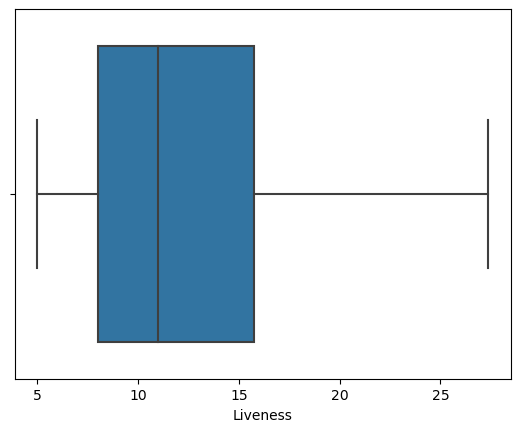

In [49]:
sns.boxplot(df['Liveness'])
plt.show()

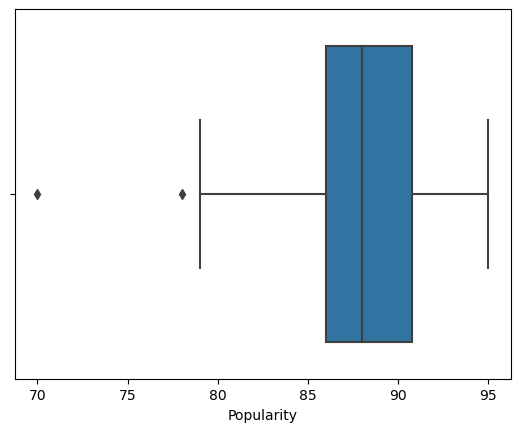

In [50]:
sns.boxplot(df['Popularity'])
plt.show()

In [51]:
#Finding the IQR

Q1 = df['Popularity'].quantile(0.25)
Q3 = df['Popularity'].quantile(0.75)

IQR = Q3-Q1

upper_limit = Q3+1.5*IQR
lower_limit = Q1-1.5*IQR

print('lower limit: ', lower_limit)
print('upper limit: ', upper_limit)
print('IQR:' , IQR)

lower limit:  78.875
upper limit:  97.875
IQR: 4.75


In [52]:
df[(df['Popularity']>upper_limit) | (df['Popularity']<lower_limit)]

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
48,"fuck, i'm lonely (with Anne-Marie) - from 13 ...",Lauv,dance pop,95,56,81.0,-6,6.0,68,199,48,7.0,78
49,If I Can't Have You,Shawn Mendes,canadian pop,124,82,69.0,-4,13.0,87,191,49,6.0,70


In [53]:
df['Popularity'] = np.where(df['Popularity']>upper_limit, upper_limit , df['Popularity']) 
df['Popularity'] = np.where(df['Popularity']<lower_limit , lower_limit , df['Popularity'])

In [54]:
df['Popularity'].max()

95.0

In [55]:
df['Popularity'].min()

78.875

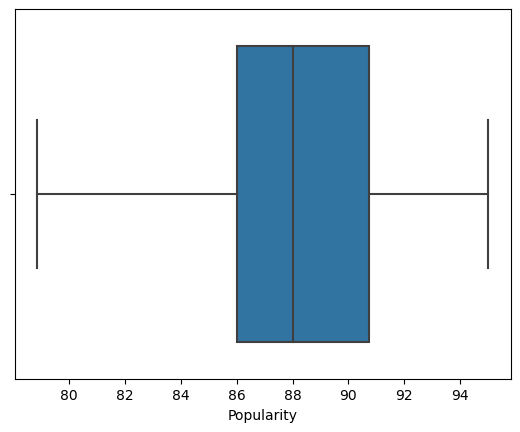

In [56]:
sns.boxplot(df['Popularity'])
plt.show()

Text(0.5, 1.0, 'Genre vs Count of the tracks')

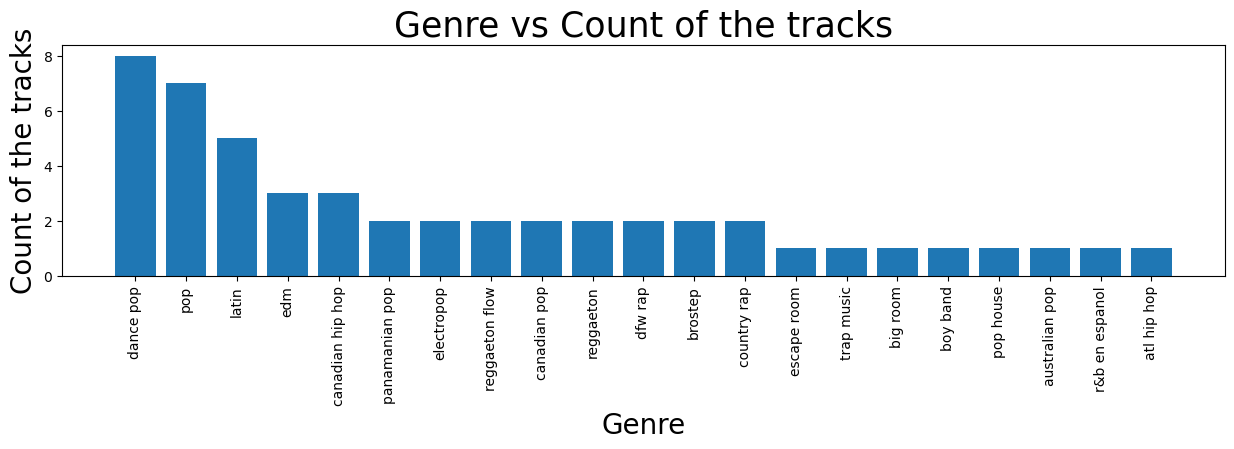

In [81]:
xtick = ['dance pop', 'pop', 'latin', 'edm', 'canadian hip hop',
'panamanian pop', 'electropop', 'reggaeton flow', 'canadian pop',
'reggaeton', 'dfw rap', 'brostep', 'country rap', 'escape room',
'trap music', 'big room', 'boy band', 'pop house', 'australian pop',
'r&b en espanol', 'atl hip hop']
length = np.arange(len(xtick))
genre_groupby = df.groupby('Genre')['track_name'].agg(len).sort_values(ascending = False)
plt.figure(figsize = (15,3))
plt.bar(length, genre_groupby)
plt.xticks(length,xtick)
plt.xticks(rotation = 90)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Count of the tracks', fontsize = 20)
plt.title('Genre vs Count of the tracks', fontsize = 25)

Text(0.5, 1.0, 'Artist Name vs Count of songs')

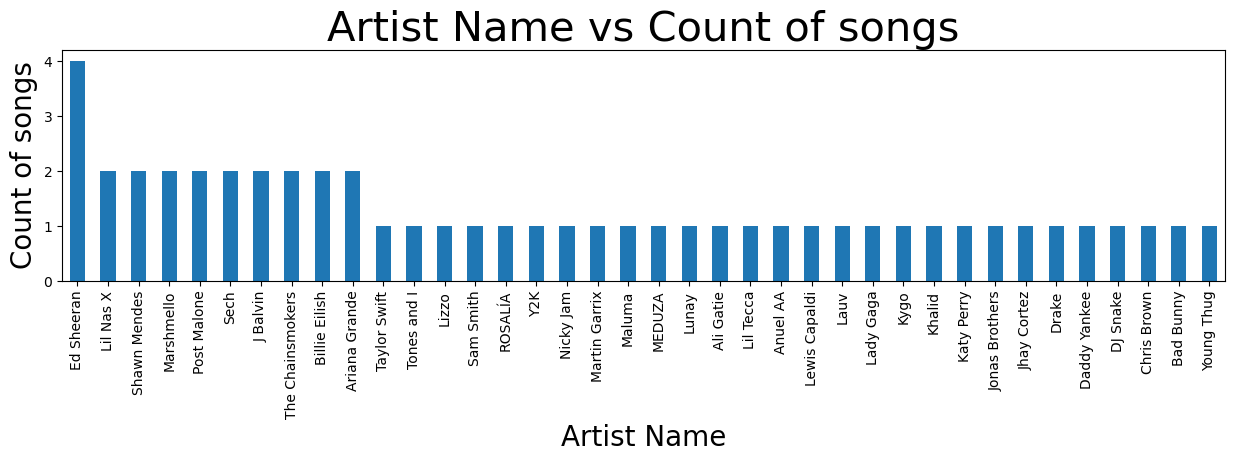

In [58]:
fig = plt.figure(figsize = (15,3))
df.groupby('artist_name')['track_name'].agg(len).sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Artist Name', fontsize = 20)
plt.ylabel('Count of songs', fontsize = 20)
plt.title('Artist Name vs Count of songs', fontsize = 30)

<AxesSubplot:xlabel='Energy', ylabel='Loudness(dB)'>

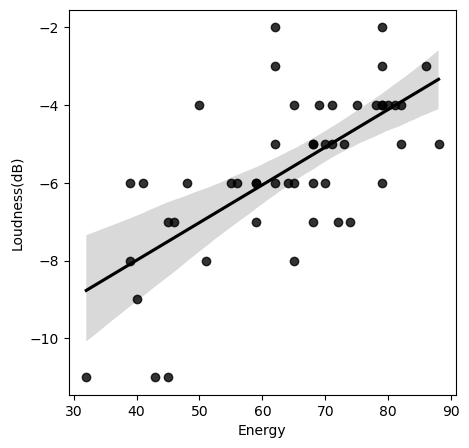

In [59]:
# Analysing the relationship between energy and loudness
# regplot plots the data and a linear regression model fit.
fig=plt.subplots(figsize=(5,5))
sns.regplot(x='Energy',y='Loudness(dB)',data=df,color='black')

In [60]:
df_copy = df
df_copy.head()

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,bad guy,Billie Eilish,electropop,135,43,70.0,-11,10.0,56,194,33,38.0,95.0
1,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58.0,-4,11.0,18,175,45,7.0,94.0
2,Callaita,Bad Bunny,reggaeton,176,62,61.0,-5,24.0,24,251,60,31.0,93.0
3,China,Anuel AA,reggaeton flow,105,81,79.0,-4,8.0,61,302,8,9.0,92.0
4,Ransom,Lil Tecca,trap music,180,64,75.0,-6,7.0,23,131,2,29.0,92.0


In [61]:
# for our analysis , lets consider popularity is the Target variable which needs to predicted.
# in source data we remove columns which are not adding much value to the prediction

In [62]:
x=df.loc[:,['beats_per_minute','Energy','Danceability','Loudness(dB)','Liveness','Valence','Length','Acousticness','Speechiness']].values
y=df.loc[:,'Popularity'].values

In [63]:
# Creating a test and training dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=30)

## Linear Regression

In [64]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [65]:
#Displaying the difference between the actual and the predicted
y_pred = regressor.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test-y_pred})
print(df_output)

    Actual  Predicted  Difference
0     84.0  88.563869   -4.563869
1     89.0  89.423718   -0.423718
2     87.0  87.357509   -0.357509
3     83.0  87.776249   -4.776249
4     91.0  83.833476    7.166524
5     88.0  84.677365    3.322635
6     87.0  84.778262    2.221738
7     88.0  87.776946    0.223054
8     87.0  84.728261    2.271739
9     89.0  91.719841   -2.719841
10    89.0  88.267917    0.732083
11    89.0  90.847600   -1.847600
12    84.0  87.633923   -3.633923
13    91.0  89.395401    1.604599
14    88.0  87.032491    0.967509


<AxesSubplot:ylabel='Density'>

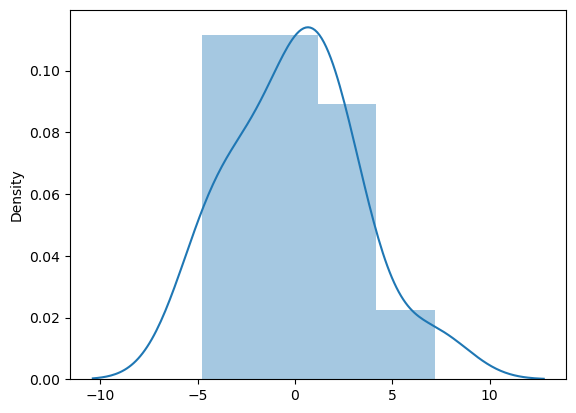

In [66]:
# As we can see, the error terms resemble closely to a normal distribution. 
# So we can move ahead and make predictions using the model in the test dataset.
sns.distplot(y_test-y_pred)

Text(0, 0.5, 'Test values')

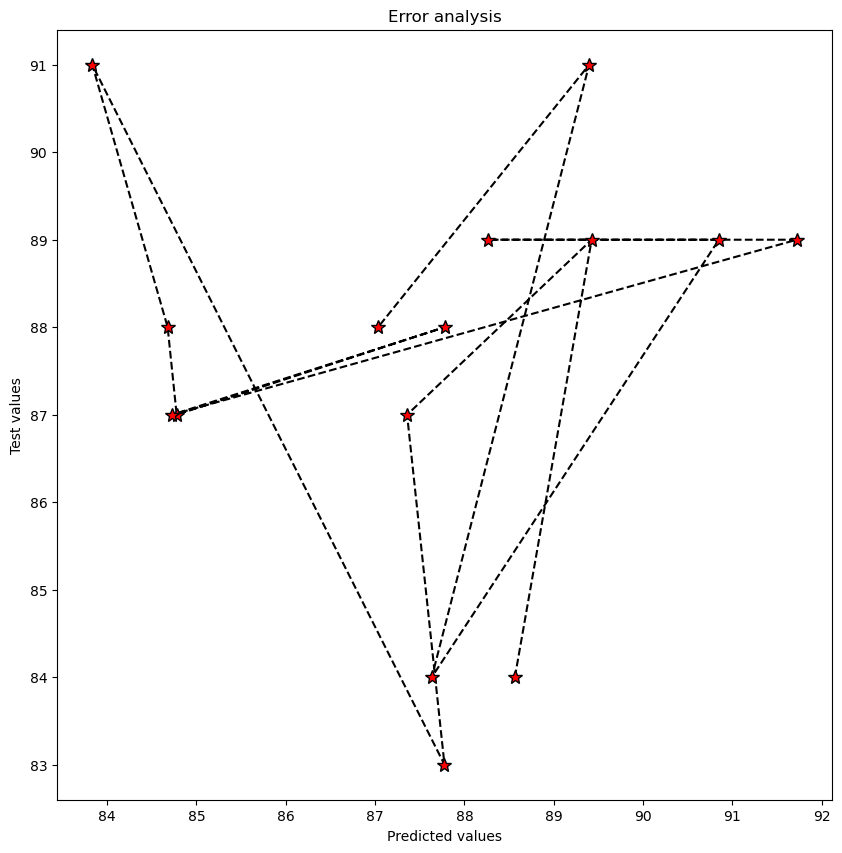

In [67]:
plt.figure(figsize=(10,10))
plt.plot(y_pred,y_test,color='black',linestyle='dashed',marker='*',markerfacecolor='red',markersize=10)
plt.title('Error analysis')
plt.xlabel('Predicted values')
plt.ylabel('Test values')

In [68]:
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.4555058259709597
Mean Squared Error: 9.63718288762005
Root Mean Squared Error: 3.104381240701607


In [69]:
# The root mean square value with Linear Regression is 2.89.

In [70]:
df.sort_values('Popularity', ascending = False)

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,bad guy,Billie Eilish,electropop,135,43,70.00,-11,10.000,56,194,33,38.000,95.000
1,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58.00,-4,11.000,18,175,45,7.000,94.000
2,Callaita,Bad Bunny,reggaeton,176,62,61.00,-5,24.000,24,251,60,31.000,93.000
3,China,Anuel AA,reggaeton flow,105,81,79.00,-4,8.000,61,302,8,9.000,92.000
4,Ransom,Lil Tecca,trap music,180,64,75.00,-6,7.000,23,131,2,29.000,92.000
5,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83.00,-4,12.000,10,205,10,5.000,92.000
6,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,dfw rap,90,48,76.00,-6,7.000,91,158,56,5.000,91.000
7,Truth Hurts,Lizzo,escape room,158,62,72.00,-3,12.000,41,173,11,11.000,91.000
8,Piece Of Your Heart,MEDUZA,pop house,124,74,68.00,-7,7.000,63,153,4,3.000,91.000
9,Panini,Lil Nas X,country rap,154,59,70.00,-6,12.000,48,115,34,8.000,91.000


In [78]:
df.sort_values('Popularity', ascending = False)
df_top5 = df.head(5)

label_description = df_top5['artist_name'] + " : " + df_top5['track_name']

([<matplotlib.patches.Wedge at 0x191d14cffa0>,
 [Text(0.8820073601077926, 0.6573150056979399, 'Billie Eilish : bad guy'),
  Text(-0.37079705943871943, 1.0356203651491211, 'Post Malone : Goodbyes (Feat. Young Thug)'),
  Text(-1.0993751288607547, -0.03707190367919064, 'Bad Bunny : Callaita'),
  Text(-0.3144308786987585, -1.0541030416997794, 'Anuel AA : China'),
  Text(0.8951201848176799, -0.6393432995910435, 'Lil Tecca : Ransom')],
 [Text(0.48109492369515955, 0.3585354576534217, '20.4%'),
  Text(-0.20225294151202874, 0.5648838355358842, '20.2%'),
  Text(-0.5996591611967752, -0.02022103837046762, '20.0%'),
  Text(-0.17150775201750465, -0.5749652954726069, '19.7%'),
  Text(0.4882473735369162, -0.34873270886784186, '19.7%')])

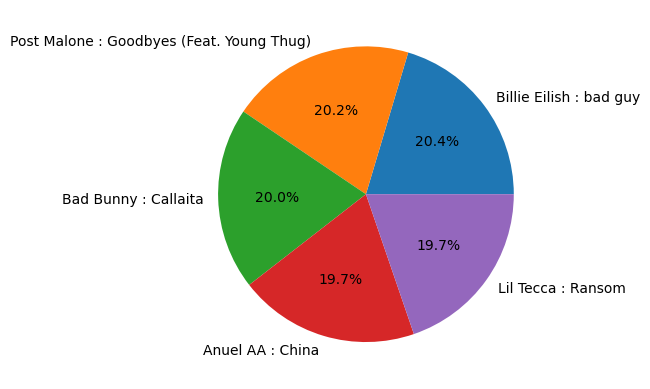

In [79]:
plt.pie(df_top5['Popularity'], labels=label_description,autopct='%1.1f%%')